In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers



In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


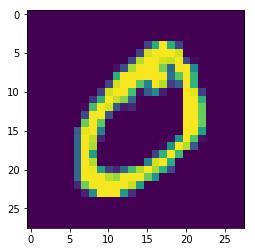

In [48]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [52]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [53]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)
train_iterator = datagen.flow(X_train, Y_train, batch_size=32)
test_iterator = datagen.flow(X_test, Y_test, batch_size=32)
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
len(train_iterator)

Batch shape=(32, 28, 28, 1), min=-0.424, max=2.822


1875

In [54]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, W_regularizer=regularizers.l2(0.0001), input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, W_regularizer=regularizers.l2(0.0001))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, W_regularizer=regularizers.l2(0.0001))) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, W_regularizer=regularizers.l2(0.0001)))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, W_regularizer=regularizers.l2(0.0001)))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, W_regularizer=regularizers.l2(0.0001)))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, W_regularizer=regularizers.l2(0.0001)))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/loc

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_64 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_40 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_65 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_41 (Activation)   (None, 24, 24, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [55]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=15,callbacks=[LearningRateScheduler(scheduler, verbose=1)])

#model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/15

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4866 - acc: 0.8539
Epoch 2/15

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2830 - acc: 0.9122
Epoch 3/15

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2479 - acc: 0.9245
Epoch 4/15

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2222 - acc: 0.9312
Epoch 5/15

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2101 - acc: 0.9359
Epoch 6/15

Epoch 00006: LearningRateScheduler setting learning rate to 0.0011560694.
1875/1875 [==============================] - 26s 14

In [56]:
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))
#score = model.evaluate(X_test, Y_test, verbose=0)
#print(score)

Test Accuracy: 99.350


In [57]:
model.predict(X_test)

array([[4.0314425e-02, 5.4644447e-02, 1.1292382e-03, ..., 8.3633071e-01,
        1.1065975e-02, 9.6429675e-04],
       [4.6238524e-01, 1.9907361e-01, 9.0734713e-02, ..., 9.7172875e-03,
        2.3703417e-02, 1.3039655e-03],
       [1.4070073e-02, 9.3834537e-01, 3.5318059e-03, ..., 3.0936261e-03,
        7.1633368e-04, 3.5157695e-04],
       ...,
       [9.2255406e-04, 1.7948277e-02, 9.9988363e-05, ..., 1.0907410e-03,
        3.7492707e-03, 5.7514226e-05],
       [2.3932660e-02, 1.5303556e-02, 4.1000231e-04, ..., 7.8760453e-02,
        3.5037819e-01, 3.9983960e-03],
       [2.3711666e-01, 3.6796063e-02, 8.9985617e-03, ..., 2.6165808e-03,
        3.6661789e-02, 5.8788909e-03]], dtype=float32)